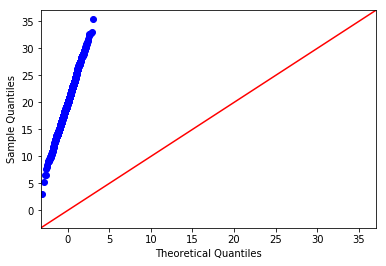

In [5]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(20,5,1000)

sm.qqplot(test, loc=20, scale=5, line='45')
pylab.show()

In [3]:
print(test)

[15.77425306 15.66216051 20.38777238 28.83902321 19.03244773 22.57386729
 20.74198393 25.21565327 26.76764551 12.25410037 28.03203131 24.92341369
 20.97998074 12.57777783 19.90332049 23.5631621  15.63350756 14.66594031
 17.73506761 23.14601199 20.8135684  15.02632699 22.59950303 25.42982401
 15.41926708 11.91413047  9.71236935 19.94410709 30.54165338 17.89880337
 12.57279478 14.54740103 18.62627933 20.09716362 23.23320439 25.12247889
 24.8247606  17.23248449 17.55080259 22.14092184 14.15377587 21.8886116
 19.30341384 25.62976962 20.21824223  2.6524816  22.89195239 15.79012265
 21.4605271  33.49083339 16.4775474  15.88668145 15.91832462 16.26469938
 16.76605502 15.17210815 20.12535095 19.8259439  22.81201422 13.72158563
 19.05992909 15.67686106 13.66246476 18.66455919 12.91315677 25.25299537
 19.38211071 27.31162838 21.592378   18.23597991 19.29706097 16.93793726
 18.02463719 25.39372298 17.41336515 25.17212967 14.55040374 20.03353548
 26.35410062 22.52140418 14.51196844 26.09950243 18.